# Reconhecimento Facial com PCA e K-means clustering

>A proposta deste projeto será realizar a análise de componentes principais (PCA) para reconhecimento de padrões em dados de faces humanas, com o objetivo de classificar imagens não utilizadas no conjunto de análise de dados.

>O desenvolvimento do projeto virá com a aplicação das técnicas canônicas de aprendizado de máquina como o algoritmo K-means clustering e o PCA, que serão os pilares da análise e inferência de dados.

>O trabalho possuirá viés didático e acadêmico aplicado a área de álgebra linear, não levando em consideração a viabilidade comercial do mesmo.

### Aluno
>Patrick Schubert de Souza Fuchs

>DRE:116080140

### PCA

>O PCA nada mais é que uma transformação linear aplicada a um conjunto de dados com o objetivo de mudar a base da matriz para uma que conserva a maior quantidade de variância possível dos dados. 

>Na imagem abaixo podemos ver que o PCA aplica uma transformação linear em um conjunto de dados inicialmente em R³, levando-os para R² de maneira que as bases estão na direção que minimiza a projeção ortogonal dos dados nessas novas bases. Como temos apenas duas bases na imagem abaixo, os dados inicialmente em R³ estão sendo projetados no plano gerado pelos dois melhores autovetores da matriz de covariância dos dados.


![alt text](http://www.nlpca.org/fig_pca_principal_component_analysis.png)



>As bases da nova matriz são os autovetores da matriz de covariância dos dados, associados aos maiores autovalores. Ou seja, os autovetores que preservam a maior quantidade de variância possível dos dados.

>A matriz de covariância é aquela que relaciona os dados da matriz de maneira a exprimir semelhanças e diferenças entre cada um deles. Para isto, devemos centralizar os dados em relação a origem subtraindo a média de cada coluna da matriz de cada dado naquela coluna e depois dividir pelo número de exemplos (dados).

>![alt text](http://www.sharetechnote.com/image/EngMath_CovarianceMatrix_07.png)

>Agora que sabemos como que cada coluna dos dados se relaciona com as demais, podemos calcular os autovetores e autovalores da matriz de covariância, que pelo teorema espectral, serão ortonormais, já que a a matriz de covariância é simétrica

>>>![alt text](https://codeforwin.org/wp-content/uploads/2015/08/Symmetric-matrix.png)

>Descobrindo os autovetores e autovalores da matriz de covariância, podemos projetar os dados nos autovetores associados aos maiores autovalores. O maior deles deve ser o autovetor que melhor preserva a variância dos dados, minimizando a distância da projeção de todos os dados ao vetor.

>>![alt text](https://skymind.ai/images/wiki/scatterplot_line.png)

>A técnica PCA é de interesse de diversas áreas relacionadas a Algebra Linear. Algumas de suas aplicações são:


>*   Visualização de Dados
*   Compressão de Dados
*   Aprendizado não-supervisionado



### K-means

>A técnica de clusterização K-means se resume a capacidade de conseguir classificar um conjunto de dados computando a distância de cada ponto a uma entidade que fixa uma classe, o centroide.

![alt text](https://camo.githubusercontent.com/851ff16abe54845c538103f232021b45ede77ae7/68747470733a2f2f692e696d6775722e636f6d2f4c4d45493254422e706e67)



## Importando Dependências

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!wget https://www.dropbox.com/s/od4m3iti7j3h4vg/data.zip?dl=0
!unzip data.zip?dl=0
!cd ~/data
if os.getcwd() != '/content/data':
  os.chdir('data')

--2019-08-27 20:18:34--  https://www.dropbox.com/s/od4m3iti7j3h4vg/data.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/od4m3iti7j3h4vg/data.zip [following]
--2019-08-27 20:18:34--  https://www.dropbox.com/s/raw/od4m3iti7j3h4vg/data.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7e820e16be5e45754005e0ff63.dl.dropboxusercontent.com/cd/0/inline/AncCA_A7-2-Q-YVoZ90N62dKGjcmbpW4E9o5WjXZNej-VbG2ecM7cGt0O4EpvQ6T2KdTOLLwyViCBnxdRhEvZHeFDaa6-HuzwzxEdagrre0Jvg/file# [following]
--2019-08-27 20:18:34--  https://uc7e820e16be5e45754005e0ff63.dl.dropboxusercontent.com/cd/0/inline/AncCA_A7-2-Q-YVoZ90N62dKGjcmbpW4E9o5WjXZNej-VbG2ecM7cGt0O4EpvQ6T2KdTOLLwyViCBnxdRhEvZHeFDaa6-HuzwzxEdagrre0Jvg/file
Resolving uc7e820e16be5e45

##Pré-Processamento de Dados

>A primeira etapa do pré-processamento de dados deve ser visualizar os dados brutos que temos para deduzirmos os tipo de mudanças que deveremos aplicar às imagens para que ela possam passar pelo processo de análise de dados.


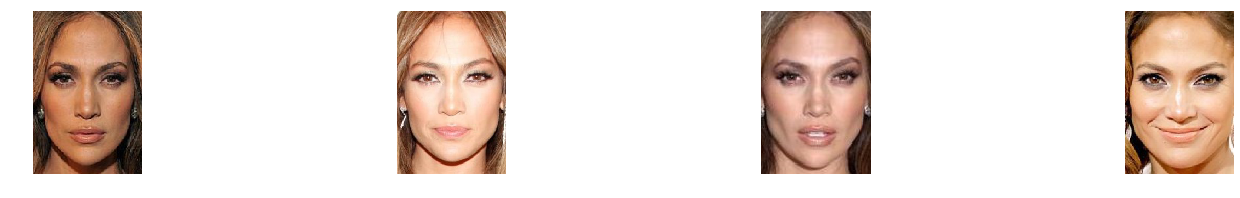

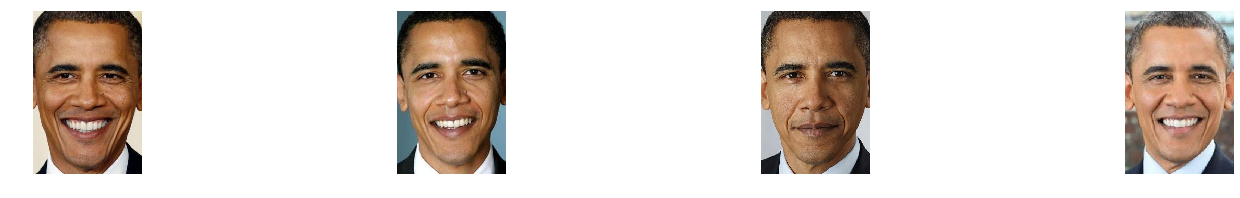

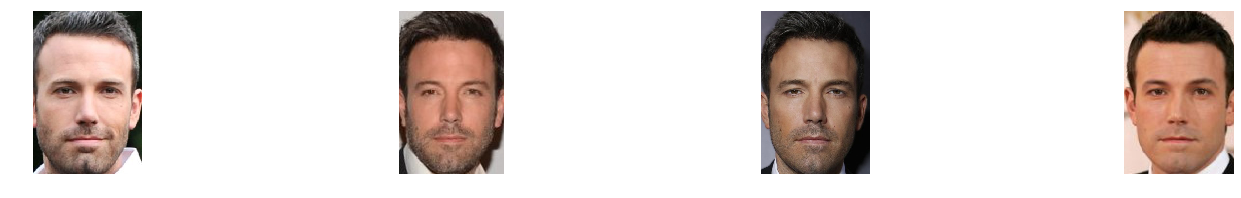

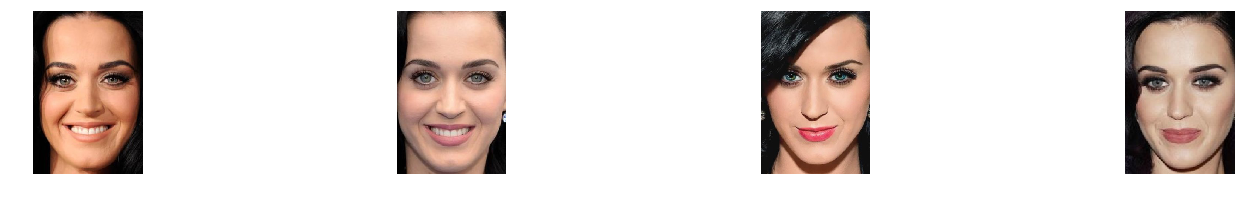

In [ ]:
from PIL import Image
import numpy
celebrities = os.listdir('train')
for celebritie in celebrities:
    fig=plt.figure(figsize=(25,3))
    for i in range(len(os.listdir('train/ben_affleck'))):
        img = Image.open(f'train/{celebritie}/' + os.listdir(f'train/{celebritie}')[i])
        fig.add_subplot(1,4,i+1)
        plt.axis('off')
        plt.imshow(img)
plt.show()

>Para tornar a análise de dados possível em complexidade de tempo iremos trabalhar com imagens em preto e branco e redimensionar os dados para que todos tenham o mesmo tamanho e possam ser alocados em uma matriz. Computando o comprimento e largura média entre todos os dados do dataset, temos os valores que apresentarão as menores quantidades de distorções nas imagens ao realizarmos o redimensionamento.

Melhor comprimento: 309.0 | Melhore Largura: 206.0


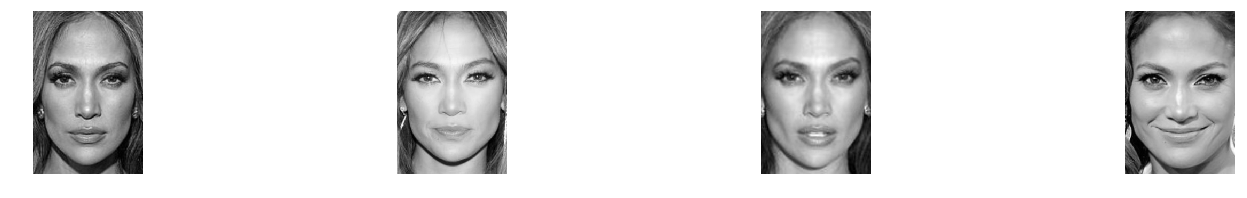

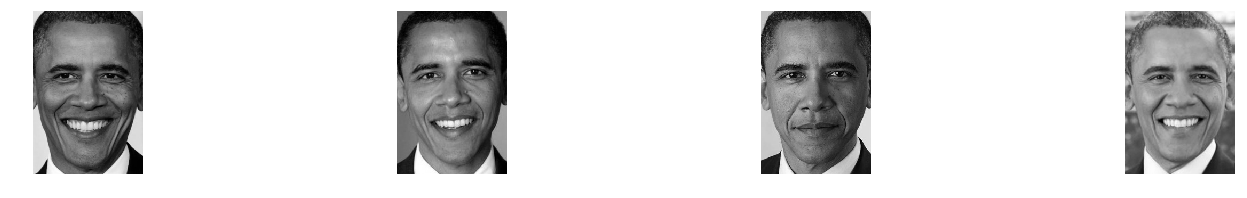

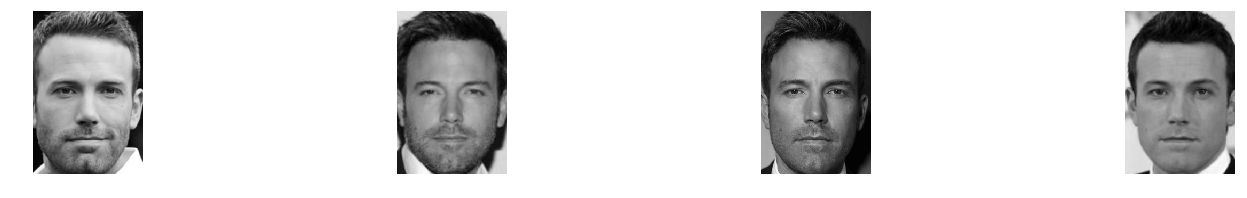

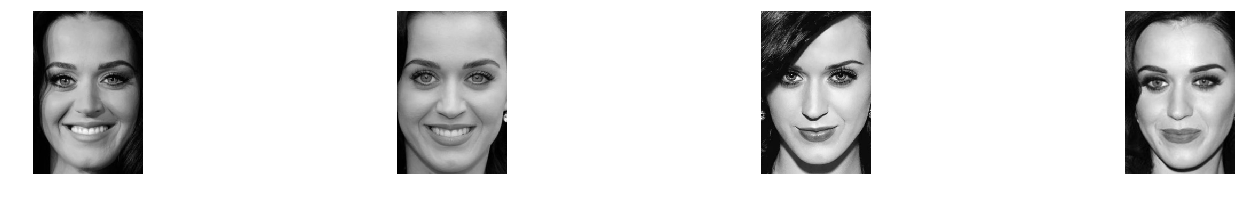

In [ ]:
height = 0
width = 0
n_photos = 0
for celebritie in celebrities:
    for i in range(len(os.listdir(f'train/{celebritie}'))):
        img = Image.open(f'train/{celebritie}/' + os.listdir(f'train/{celebritie}')[i])
        img = np.asarray(img)
        height += img.shape[0] 
        width += img.shape[1]
        n_photos +=1
height /= n_photos
width /= n_photos
print(f"Melhor comprimento: {np.ceil(height)} | Melhore Largura: {np.ceil(width)}")

from google.colab.patches import cv2_imshow
import cv2
for celebritie in celebrities:
    fig=plt.figure(figsize=(25,3))
    for i in range(len(os.listdir(f'train/{celebritie}'))):
        img = Image.open(f'train/{celebritie}/' + os.listdir(f'train/{celebritie}')[i])
        
        img = np.asarray(img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (int(width),int(height)))
        fig.add_subplot(1,4,i+1)
        plt.axis('off')
        plt.imshow(img, cmap='gray')


plt.show()

>As imagens serão vetorizadas (Processo que transforma uma matriz em vetor) e alocadas horizontalmente em uma matrix de Imagens x n_pixels para que possam passar pelo processo de análise de dados.

In [ ]:
flag = False
count = 1
const = 5
for celebritie in celebrities:
    for i in range(len(os.listdir(f'train/{celebritie}'))):
        img = Image.open(f'train/{celebritie}/' + os.listdir(f'train/{celebritie}')[i])
        img = np.asarray(img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (int(width/const),int(height/const)))
        img = np.reshape(img,(1,  int(width/const)*int(height/const)))
        img = img/255
        count += 1
      
        if flag == False:
           concat = img
           flag = True
        else:
           concat = np.concatenate([concat,img], axis=0)
            
print(f"Dimensão da Matriz final: {concat.shape}")

Dimensão da Matriz final: (16, 2501)


##Análise de Dados

>Agora que já processamos os dados, podemos começar a construir o nosso PCA

In [ ]:
media = np.mean(concat.T, axis=1)
conc = concat - media
cov_matrix = np.transpose(conc) @ conc
eig_vals, eig_vecs = np.linalg.eig(cov_matrix/15)

In [ ]:
count = 0
for i in range(eig_vecs.shape[1]):
    if 1.1 == np.linalg.norm(eig_vecs[:,i]) >= 0.9:
      count +=1
      
print(f"Numero de vetores normalizados: {count} | Numero de autovetores: {eig_vecs.shape[1]}")

count = 0
for i in range(1,eig_vecs.shape[1]):
    if (int(np.real((eig_vecs[:,i-1].T @ eig_vecs[:,i])))) == 0:
      count += 1
      
print(f"Numero de vetores ortogonais entre si: {count}")

Numero de vetores normalizados: 0 | Numero de autovetores: 2501
Numero de vetores ortogonais entre si: 1842


>Podemos verificar acima que todos os autovetores estão normalizados e quase todos são perfeitamente ortogonais entre si. 

In [ ]:
P = conc @ eig_vecs[:,:2]
P = np.real(P)
print((P).shape)
print((P)[:10,:])


(16, 2)
[[-0.58295981 -3.81307679]
 [ 6.27927519  2.57826892]
 [ 4.20836291 -0.87288523]
 [ 6.3987143   1.66739633]
 [-7.55468706 -3.10945712]
 [-5.12920242 -3.60916463]
 [-7.63866122 -3.42495776]
 [ 0.88531843  3.21998233]
 [ 2.72767159  8.4915881 ]
 [-5.07649428  3.23515951]]


>Após termos calculados os nosso componentes principais, podemos projetar os dados nos dois melhores autovetores da transformação, comprimindo dados em dimensão 2501 para R².

In [ ]:
pca_variance = [eig_vals[:2]/sum(eig_vals)]
pca_variance = np.real(pca_variance)
print(f"A primeira componente principal retém {pca_variance[0][0] * 100:.2f}% da variância total do dataset e a segunda componente {pca_variance[0][1] * 100:.2f}%")

A primeira componente principal retém 31.44% da variância total do dataset e a segunda componente 16.58%


##Visualização de Dados

>

Podemos observar que a primeira autoface produz um rosto genérico.
Por ser a componente que retém a maior quantidade de variância possível dos dados, este é um resultado esperado já que este autovetor é a melhor projeção dos dados no espaço de parâmetros do PCA.
Supreendentemente podemos perceber também que a segunda autoface é completamente dominada pelo Ben Affleck.


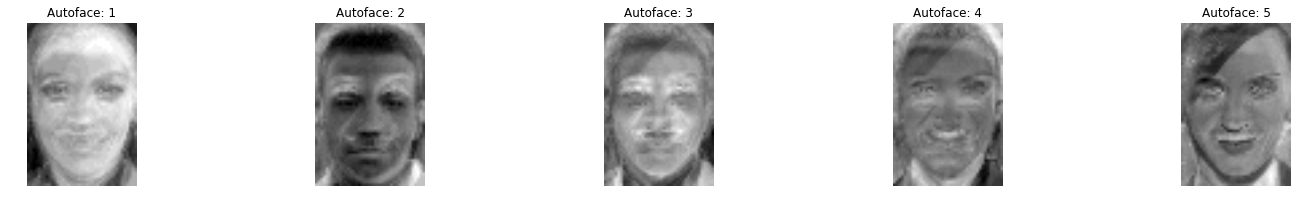

In [ ]:
fig=plt.figure(figsize=(25,3))
for i in range(5):
    plot = eig_vecs + media
    plot = np.reshape(plot[:,i],(61,41))
    plot = np.real(plot)
    plot = plot *255
    plot = plot.astype('int')
    fig.add_subplot(1,5,i+1).set_title(f'Autoface: {i+1}')
    plt.axis('off')
    plt.imshow(plot,interpolation = 'bilinear', cmap='gray')

print("Podemos observar que a primeira autoface produz um rosto genérico.")
print("Por ser a componente que retém a maior quantidade de variância possível dos dados, este é um resultado esperado já que este autovetor é a melhor projeção dos dados no espaço de parâmetros do PCA.")
print("Supreendentemente podemos perceber também que a segunda autoface é completamente dominada pelo Ben Affleck.")
plt.show()

In [ ]:
target = []
target_float = []
tmp = os.listdir('train')
for i in range(len(tmp)):
    for j in range(len(os.listdir(f'train/{tmp[i]}'))):
        target.append(tmp[i])
        target_float.append(i)
print(target)

['jennifer_lopez', 'jennifer_lopez', 'jennifer_lopez', 'jennifer_lopez', 'barack_obama', 'barack_obama', 'barack_obama', 'barack_obama', 'ben_affleck', 'ben_affleck', 'ben_affleck', 'ben_affleck', 'katy_perry', 'katy_perry', 'katy_perry', 'katy_perry']


>Visualizando o espaço R² dos dados nas novas bases do PCA

No gráfico podemos perceber duas coisas interessantes.
	1. O Ben Affleck dominando a variância na segunda componente, o que é bem coerente com o que vimos nos plots das autoface acima.
	2. Apesar de não termos agrupamentos(Clusters) inambíguos, o PCA conseguiu separar linearmente os gêneros masculino e feminino dos dados.



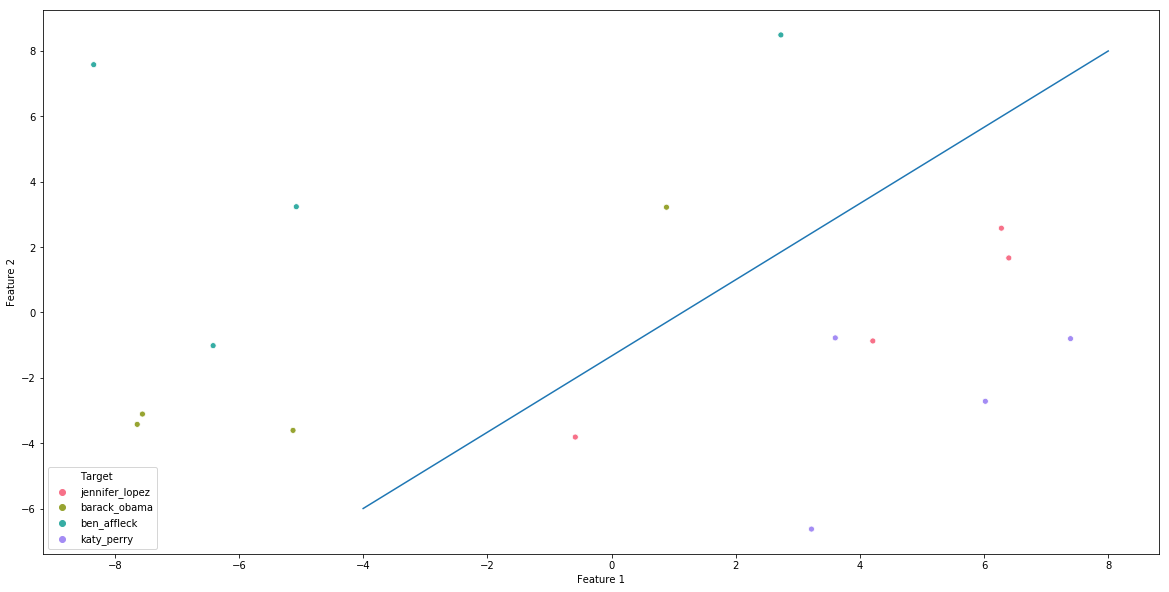

In [ ]:
import seaborn as sns
#sns.set()
target = np.asarray(target)
target = np.reshape(target, (target.shape[0],1))
target_df = pd.DataFrame(data = target, columns = ['Target'])
data_df = pd.DataFrame(data = P, columns = ['Feature 1', 'Feature 2'])
plot_df = pd.concat([data_df,target_df], axis = 1)
print("No gráfico podemos perceber duas coisas interessantes.")
print("\t1. O Ben Affleck dominando a variância na segunda componente, o que é bem coerente com o que vimos nos plots das autoface acima.")
print("\t2. Apesar de não termos agrupamentos(Clusters) inambíguos, o PCA conseguiu separar linearmente os gêneros masculino e feminino dos dados.\n")
fig = plt.figure(figsize=(20,10))
sns.scatterplot(x="Feature 1" , y="Feature 2", palette = sns.color_palette("husl", len(np.unique(plot_df['Target']))),
                         hue='Target', data=plot_df)
plt.plot((-4,8), (-6,8))

plt.show()

Mapping:

Jennifer_lopez: 0
Barack_obama: 1
Ben_affleck: 2
Katy_perry: 3
 
True values: [[0 0 0 0 1 1 1 1 2 2 2 2 3 3 3 3]]
Predicts:    [[3 0 3 0 1 1 1 0 0 2 1 2 3 3 3 3]]

Conseguimos automatizar a classificação dos dados utilizados no PCA com acurária de 68.75%.


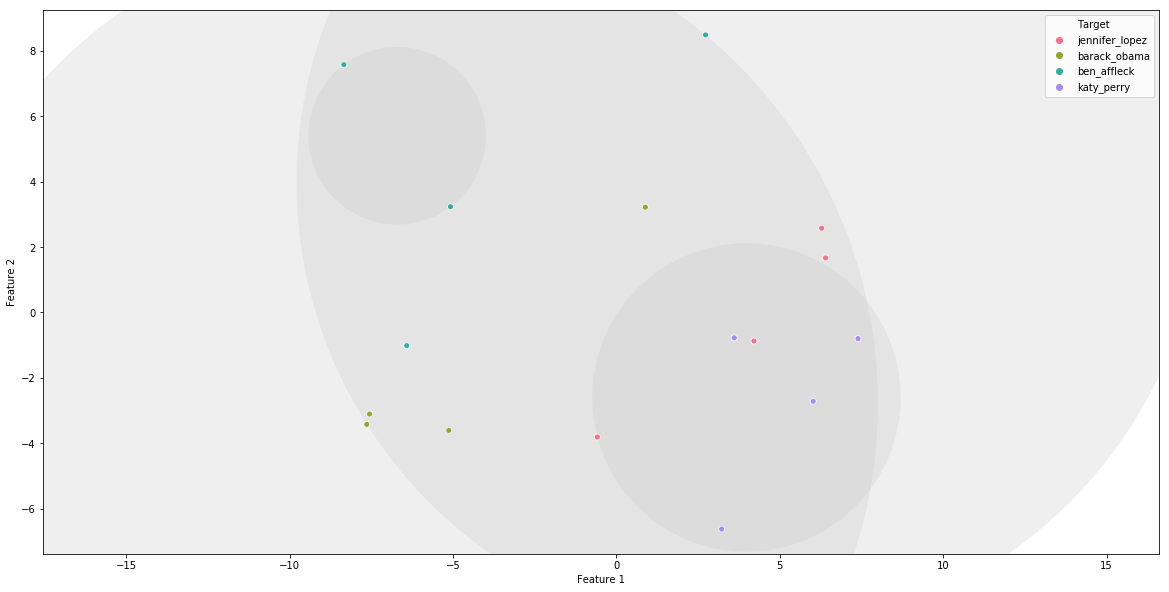

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

y_test = np.asarray(target_float)
y_test = np.reshape(y_test, (y_test.shape[0],1))

n_clusters = len(np.unique(y_test))
kmeans = KMeans(n_clusters=n_clusters, n_init=2000)
y_pred_kmeans = kmeans.fit_predict(P)

from scipy.stats import mode
y_pred_kmeans = np.reshape(y_pred_kmeans, (y_pred_kmeans.shape[0],1))
labels = np.zeros_like(y_pred_kmeans)
for i in range(n_clusters):
    mask = (y_pred_kmeans == i)
    #print(mode(y_test[mask]))
    labels[mask] = mode(y_test[mask])[0]


fig = plt.figure(figsize=(20,10))
ax = plt.gca()
ax.axis('equal')
sns.scatterplot(x="Feature 1" , y="Feature 2", palette = sns.color_palette("husl", len(np.unique(plot_df['Target']))),
                         hue='Target', data=plot_df)
#plot the representation of the KMeans model
centers = kmeans.cluster_centers_
radii = [cdist(plot_df[labels == i].values[:,:2], [center]).max()
         for i, center in enumerate(centers)]
for c, r in zip(centers, radii):
    ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.3, zorder=0.2))

from sklearn.metrics import accuracy_score

print("Mapping:\n")
tmp = os.listdir('train')
for i in range(len(tmp)):
  print(f"{tmp[i].capitalize()}: {i}")
  
print(" ")
print(f"True values: {y_test.T}")
print(f"Predicts:    {labels.T}")

print(f"\nConseguimos automatizar a classificação dos dados utilizados no PCA com acurária de {accuracy_score(y_test, labels)*100}%.")

###Validação

Como estamos tentando automatizar a classificação de um conjunto de dados, o interessante é saber se o nosso algoritmo consegue
generalizar o conhecimento adquirido no conjunto usado na análise de dados para exemplos nunca antes visto.

Utilizaremos 4 imagens, 1 de cada celebridade, para validar o nosso algoritmo.


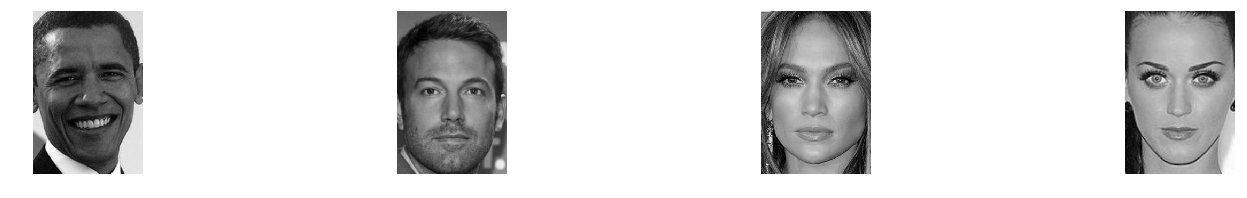

In [ ]:
fig=plt.figure(figsize=(25,3))
for celebritie in celebrities:
    #fig=plt.figure(figsize=(25,3))
    for i in range(len(os.listdir(f'val/{celebritie}'))):
        img = Image.open(f'val/{celebritie}/' + os.listdir(f'val/{celebritie}')[i])
        
        img = np.asarray(img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (int(width),int(height)))
        fig.add_subplot(1,4,celebrities.index(celebritie)+1)
        plt.axis('off')
        plt.imshow(img, cmap='gray')

print("Utilizaremos 4 imagens, 1 de cada celebridade, para validar o nosso algoritmo.")
plt.show()

Os dados de validação passarão pelo mesmo preprocessamento que os dados da análise de dados.

In [ ]:
flag = False
count = 1
for celebritie in celebrities:
    #fig=plt.figure(figsize=(25,3))
    for i in range(len(os.listdir(f'val/{celebritie}'))):
        img = Image.open(f'val/{celebritie}/' + os.listdir(f'val/{celebritie}')[i])
        img = np.asarray(img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (int(width/5),int(height/5)))
        img = np.reshape(img,(1, int(width/5)*int(height/5)))
        img = img/255
        #if count == 16:
        #   break
        count += 1
      
        if flag == False:
            concat_val = img
            flag = True
        else:
           concat_val = np.concatenate([concat_val,img], axis=0)
            

print(f"Dimensão da Matriz final de validação: {concat_val.shape}")

Dimensão da Matriz final de validação: (4, 2501)


É importante notar que os dados de validação não serão utilizados para computar o PCA, apenas serão projetados nos autovetores já computados no conjunto da análise de dados.

In [ ]:
concat_vals = concat_val - media
P_val = (concat_vals[:,:] @ eig_vecs[:,:2])
P_val = np.real(P_val)
P_val = np.concatenate([P,P_val], axis=0)


No plot podemos observar os dados de validação (Marcados com 'X') junto do antigo conjunto de dados, projetados no espaço dos dois primeiros autovetores.


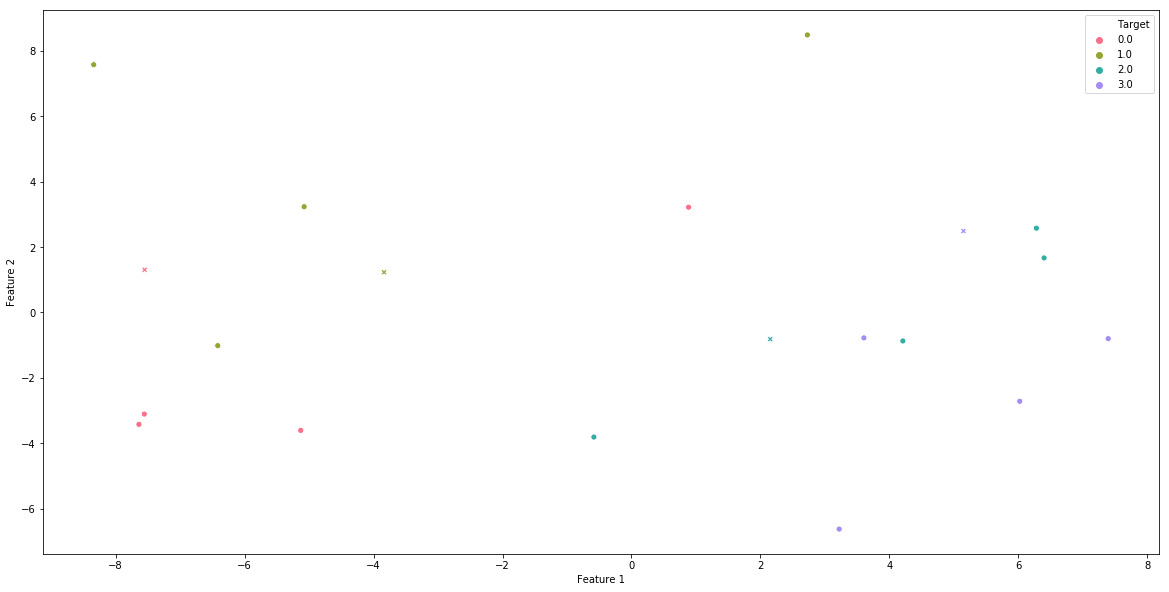

In [ ]:
import seaborn as sns
#sns.set()
if len(target_float) == P.shape[0]:
  for i in range(4):
    target_float.append(i)
    
target = np.asarray(target_float)
target = np.reshape(target, (target.shape[0],1))
plot_df = np.concatenate([P_val, target], axis=1)
plot_df = pd.DataFrame(data = plot_df, columns = ['Feature 1', 'Feature 2', 'Target'])

fig = plt.figure(figsize=(20,10))
plot_1 = sns.scatterplot(x="Feature 1" , y="Feature 2", palette = sns.color_palette("husl", len(np.unique(plot_df['Target']))),
                         hue='Target', data=plot_df[:-4])

plot_2 = sns.scatterplot(x="Feature 1" , y="Feature 2", palette = sns.color_palette("husl", len(np.unique(plot_df['Target']))),
                         hue='Target', data=plot_df[-4:], marker="X", legend=False)


print("No plot podemos observar os dados de validação (Marcados com 'X') junto do antigo conjunto de dados, projetados no espaço dos dois primeiros autovetores.")


Mapping:

Ben_affleck: 0
Katy_perry: 1
Barack_obama: 2
Jennifer_lopez: 3
 
True values: [[0 1 2 3]]
Predicts:    [[0 3 0 1]]

Conseguimos automatizar a classificação dos dados NÃO utilizados no PCA com acurária de 25.0%.


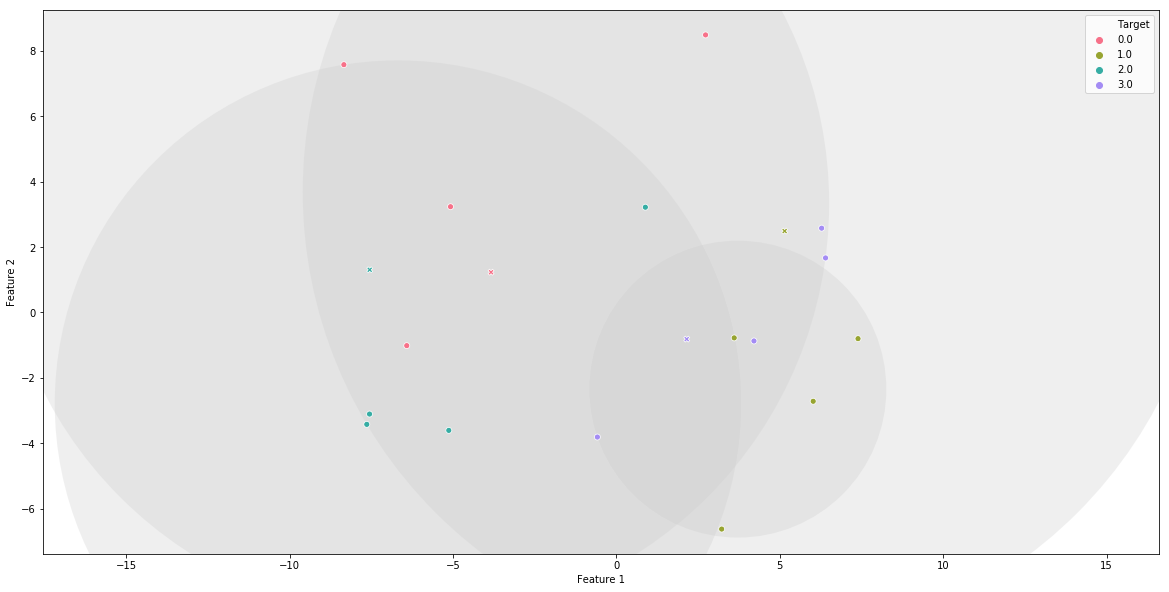

Apesar de o resultado não ser suficientemente satisfatório para fins comerciais, podemos notar que não houve ambiguidade na classificação do gênero dos dados.
Com isto, temos uma acurácia de 100% para a classificação do gênero.


In [ ]:
from sklearn.cluster import KMeans


y_test = np.asarray(target)
y_test = np.reshape(y_test, (y_test.shape[0],1))

n_clusters = len(np.unique(y_test))
kmeans = KMeans(n_clusters=n_clusters, n_init=200)
y_pred_kmeans = kmeans.fit_predict(P_val)

from scipy.stats import mode
y_pred_kmeans = np.reshape(y_pred_kmeans, (y_pred_kmeans.shape[0],1))
labels = np.zeros_like(y_pred_kmeans)
for i in range(n_clusters):
    mask = (y_pred_kmeans == i)
    labels[mask] = mode(y_test[mask])[0]

from sklearn.metrics import accuracy_score
print("Mapping:\n")
tmp = os.listdir('train')
for i in range(len(tmp)):
  print(f"{tmp[i].capitalize()}: {i}")
  
print(" ")
print(f"True values: {y_test[-4:].T}")
print(f"Predicts:    {labels[-4:].T}")

print(f"\nConseguimos automatizar a classificação dos dados NÃO utilizados no PCA com acurária de {accuracy_score(y_test[-4:], labels[-4:])*100}%.")

fig = plt.figure(figsize=(20,10))
ax = plt.gca()
ax.axis('equal')
plot_1 = sns.scatterplot(x="Feature 1" , y="Feature 2", palette = sns.color_palette("husl", len(np.unique(plot_df['Target']))),
                         hue='Target', data=plot_df[:-4])

plot_2 = sns.scatterplot(x="Feature 1" , y="Feature 2", palette = sns.color_palette("husl", len(np.unique(plot_df['Target']))),
                         hue='Target', data=plot_df[-4:], marker="X", legend=False)
#plot the representation of the KMeans model
centers = kmeans.cluster_centers_
radii = [cdist(plot_df[labels == i].values[:,:2], [center]).max()
         for i, center in enumerate(centers)]
for c, r in zip(centers, radii):
    ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.3, zorder=0.2))

plt.show()

print("Apesar de o resultado não ser suficientemente satisfatório para fins comerciais, podemos notar que não houve ambiguidade na classificação do gênero dos dados.")
print("Com isto, temos uma acurácia de 100% para a classificação do gênero.")

###Conclusões

O resultado obtido ao final de todo o pipeline de análise de dados não é bom o suficiente para viabilizar uma aplicação comercial do mesmo. O resultado final tem suas raízes em 3 motivações:

- Baixo número de exemplos utilizado no conjunto de análise de dados.
- Linearidade do algoritmo pode ser um fator limitante na tarefa de captar padrões mais robusto na classificação.
- "Pixel Dependency". O algoritmo utilizado leva em consideração semelhanças e diferenças pixel a pixel de cada imagem, de forma que padrões encontrados nas imagens estão limitados pelas suas posições, o que exige um preprocessamento inambiguo dos dados e dificulta em muito o poder de inferência do algoritmo. (O problema de localidade já possui solução definitiva nos dias de hoje e pode ser sanado utilizando redes neurais convolucionais, tópico que está fora do escopo deste trabalho e curso.)

Contudo, podemos concluir que o PCA, apesar de não ter conseguido classificar as celebridades de forma inequívoca, foi eficiente em capturar padrões nas imagens conseguindo uma classificação perfeita, linearmente separavel e didaticamente compreensível do gênero dos dados.

#Bônus!!


###Com que famoso você mais se parece?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import os 
drive.mount('/content/gdrive')
if os.getcwd() != '/content/gdrive/My Drive/Colab Notebooks/ALA/data/lab': 
  os.chdir('/content/gdrive/My Drive/Colab Notebooks/ALA/data/lab')
print(os.getcwd())
print(os.listdir())

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/ALA/data/lab
['data', '20190826_193737.jpg', 'data.zip?dl=0', '20190827_121606.jpg', 'data.zip?dl=0.1', '20190827_171741.jpg']


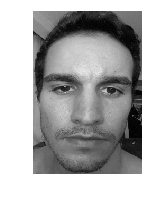

In [ ]:
fig=plt.figure(figsize=(25,3))
from PIL import Image
import cv2

height = 309.0 
width = 206.0
#fig=plt.figure(figsize=(25,3))
index_foto = 1

img = Image.open(os.listdir()[index_foto])
img = np.asarray(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (int(width),int(height)))
#fig.add_subplot(1,4,celebrities.index(celebritie)+1)
plt.axis('off')
plt.imshow(img, cmap='gray')

plt.show()

In [ ]:
flag = False
count = 1

img = Image.open(os.listdir()[index_foto])
img = np.asarray(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (int(width/5),int(height/5)))
img = np.reshape(img,(1, int(width/5)*int(height/5)))
img = img/255
#if count == 16:
#   break
count += 1

if flag == False:
    concat_val = img
    flag = True
else:
   concat_val = np.concatenate([concat_val,img], axis=0)


print(f"Dimensão da Matriz: {concat_val.shape}")

Dimensão da Matriz: (1, 2501)


In [ ]:
concat_vals = concat_val - media
P_val = (concat_vals[:,:] @ eig_vecs[:,:2])
P_val = np.real(P_val)
P_val = np.concatenate([P,P_val], axis=0)


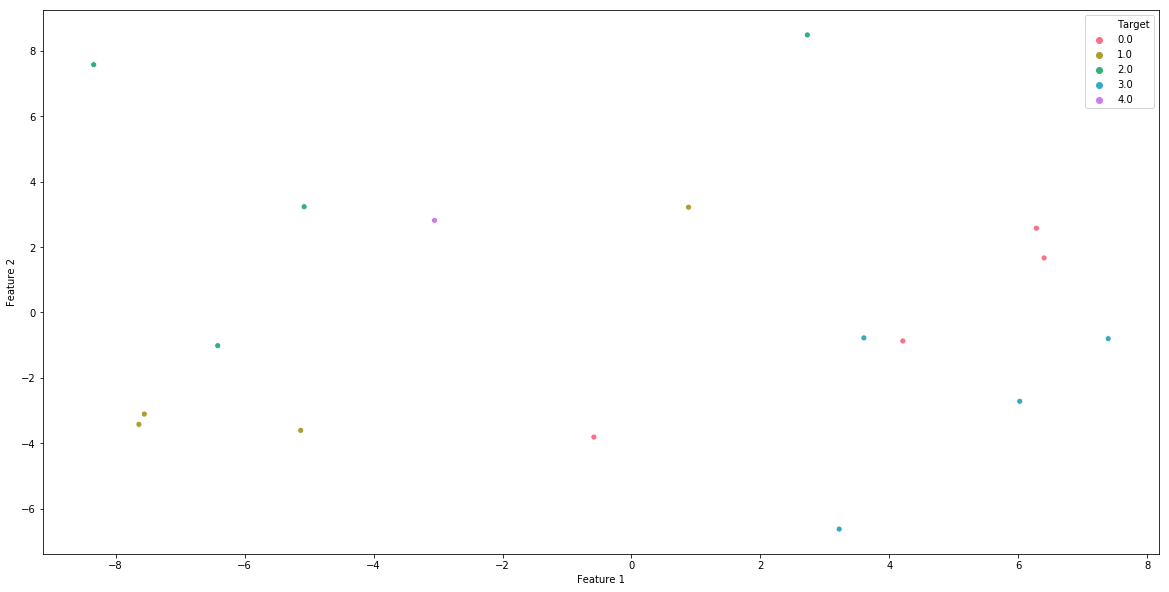

In [ ]:
import seaborn as sns
#sns.set()
if len(target_float) == P.shape[0]:
  target_float.append(4.0)
    
target = np.asarray(target_float)
target = np.reshape(target, (target.shape[0],1))
plot_df = np.concatenate([P_val, target], axis=1)
plot_df = pd.DataFrame(data = plot_df, columns = ['Feature 1', 'Feature 2', 'Target'])
fig = plt.figure(figsize=(20,10))
plot_1 = sns.scatterplot(x="Feature 1" , y="Feature 2", palette = sns.color_palette("husl", len(np.unique(plot_df['Target']))),
                         hue='Target', data=plot_df)




Mapping:

Jennifer_lopez: 0
Barack_obama: 1
Ben_affleck: 2
Katy_perry: 3
 
True values: [4.]
Predicts:    [2]


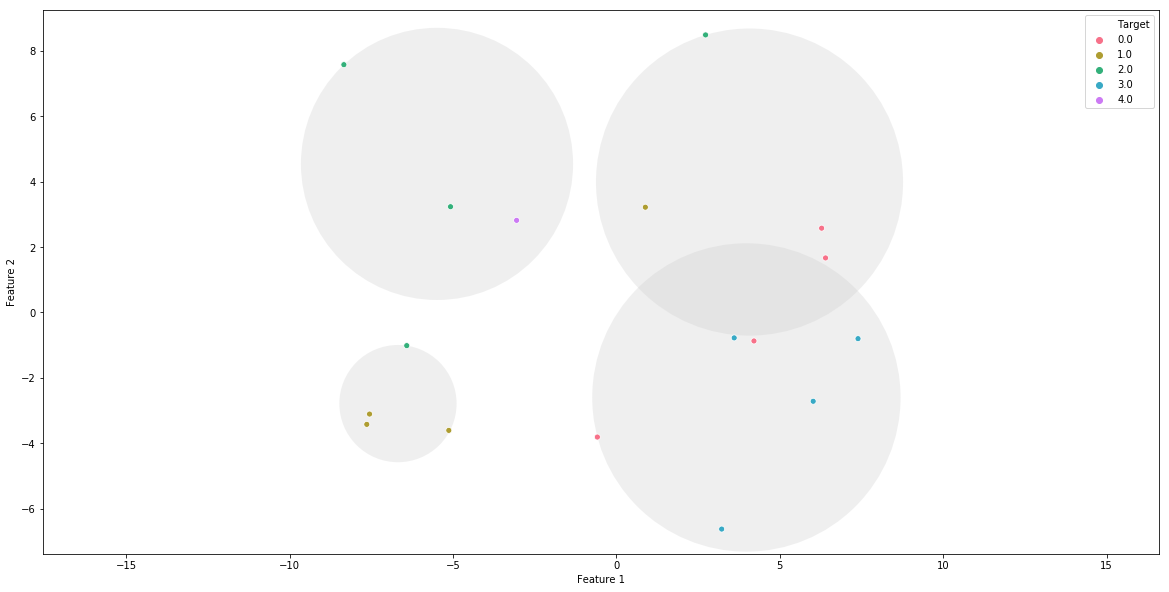

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

y_test = np.asarray(target_float)
y_test = np.reshape(y_test, (y_test.shape[0],1))

n_clusters = len(np.unique(y_test)) - 1
kmeans = KMeans(n_clusters=n_clusters, n_init=2000)
y_pred_kmeans = kmeans.fit_predict(P_val)

from scipy.stats import mode
y_pred_kmeans = np.reshape(y_pred_kmeans, (y_pred_kmeans.shape[0],1))
labels = np.zeros_like(y_pred_kmeans)
for i in range(n_clusters):
    mask = (y_pred_kmeans == i)
    #print(mode(y_test[mask]))
    labels[mask] = mode(y_test[mask])[0]


fig = plt.figure(figsize=(20,10))
ax = plt.gca()
ax.axis('equal')
sns.scatterplot(x="Feature 1" , y="Feature 2", palette = sns.color_palette("husl", len(np.unique(plot_df['Target']))),
                         hue='Target', data=plot_df)
#plot the representation of the KMeans model
centers = kmeans.cluster_centers_
radii = [cdist(plot_df[labels == i].values[:,:2], [center]).max()
         for i, center in enumerate(centers)]
for c, r in zip(centers, radii):
    ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.3, zorder=0.2))

from sklearn.metrics import accuracy_score

print("Mapping:\n")
tmp = os.listdir('/content/data/train')
#tmp.sort()
for i in range(len(tmp)):
  print(f"{tmp[i].capitalize()}: {i}")
  
print(" ")
print(f"True values: {y_test[-1].T}")
print(f"Predicts:    {labels[-1].T}")

###Muito Obrigado
Espero que vc tinha se divertido!!